In [2]:

#hide
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import fastbook
fastbook.setup_book()

#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 176.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 13.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packa

In [3]:
# note, you'll need to import the DF from this kaggle notebook, I just downloaded it
# https://www.kaggle.com/datasets/uciml/adult-census-income
df = pd.read_csv('adult.csv')

# Split the data into training and testing sets
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)


In [4]:
train_df.head()

,age,workclass,fnlwgt,education,...,capital.loss,hours.per.week,native.country,income
14160,29,Private,280618,Some-college,...,0,40,United-States,<=50K
27048,19,Private,439779,Some-college,...,0,15,United-States,<=50K
28868,28,Private,204734,Some-college,...,0,40,United-States,<=50K
5667,35,Private,107991,11th,...,0,45,United-States,<=50K
7827,20,Private,54152,Some-college,...,0,30,?,<=50K


In [5]:
train_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
dep_var = 'income'

In [7]:
df['fnlwgt'].unique()

array([ 77053, 132870, 186061, ...,  34066,  84661, 257302])

In [8]:
df.size

488415

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
my_train_df, eval_df = train_test_split(train_df, test_size=0.3, random_state=42)


In [10]:
train_idx = list(my_train_df.index)
valid_idx = list(eval_df.index)
splits = (train_idx, valid_idx)


In [11]:
procs = [Categorify, FillMissing]
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)


In [12]:
to.show(3)


,workclass,education,marital.status,occupation,relationship,race,sex,native.country,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
3288,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,?,50,75472,9,4386,0,40,<=50K
3855,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,24,296045,4,2635,0,38,<=50K
3734,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,39,49020,13,3103,0,48,>50K


In [13]:
xs,y = to.train.xs,to.train.y


In [14]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);


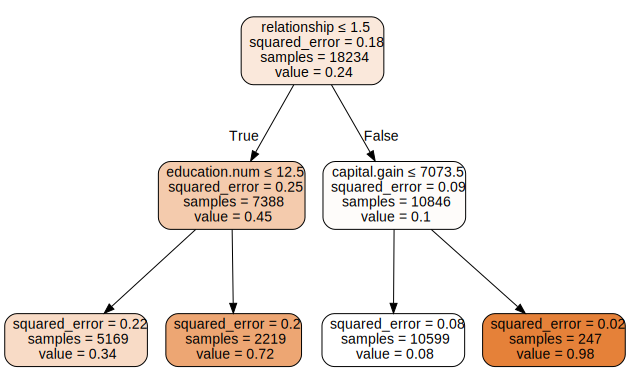

In [15]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


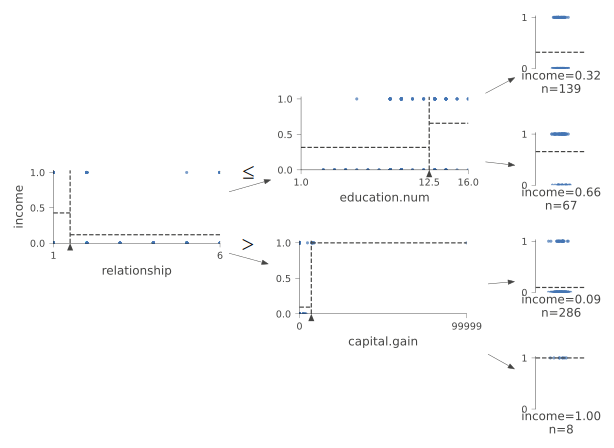

In [16]:

samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')
